# ipywidgets-jsonschema demo

`ipywidgets-jsonschema` allows you to generate a widget form from an existing schema that follows th JSON Schema specification. We first define a schema:

Generating the widget form for it and visualizing it in Jupyter is as simple as this:

In [1]:
from ipywidgets_jsonschema import Form
import ipywidgets as widgets
from IPython.display import display

In [2]:
import json
import glob
import csv
import os

In [3]:
from rpy2 import robjects

# activate R magic
%load_ext rpy2.ipython

In [4]:
# !wget https://datahub.io/machine-learning/iris/r/iris.csv

In [5]:
# !wget https://datahub.io/machine-learning/autos/r/autos.csv

## Find csv ans json-schema files

In [6]:
!pwd

/home3/p270806


In [7]:
csvfiles = glob.glob('*.{}'.format('csv'),recursive=True)
print(csvfiles)

jsfiles = glob.glob('./**/*{}'.format('schema.json'),recursive=True)
print(jsfiles)

['iris.csv', 'autos.csv', 'exergamelf2.csv']
['./histogram_schema.json', './pca_projection_schema.json', './scatter_schema.json', './violin_schema.json', './heatmap_schema.json']


In [8]:
# import re

# extract kind of plot
jsfiles = [(os.path.split(f)[-1].split('_', 1)[0],f) for f in jsfiles]
jsfiles

[('histogram', './histogram_schema.json'),
 ('pca', './pca_projection_schema.json'),
 ('scatter', './scatter_schema.json'),
 ('violin', './violin_schema.json'),
 ('heatmap', './heatmap_schema.json')]

### Get column names function from a data file

In [9]:

def setcolnames(jschema):
    if isinstance(jschema, dict):
        if "$comment" in jschema:
            jschema['enum'] = fcolumns
        for key, value in jschema.items():
            setcolnames(value)
    elif isinstance(jschema, list):
        for item in jschema:
            setcolnames(item)

            
def getcolnames(csvfile):
    # TODO: validate that the columns can be extracted
    with open(csvfile, 'r', newline='') as f_headers:
        fcols = next(csv.reader(f_headers))
    return(fcols)
    
fcolumns = getcolnames(csvfiles[0])
fcolumns
    

['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']

### Select a datafile, a json schema (task)

In [10]:
# function to run rugplot R methods

def runrmethod(jstring, tplot):
    # jsonparams = json.dumps(jsform.data)
    # vplot = menuSchemas.label
    robjects.globalenv['jsonparams'] = jstring
    robjects.globalenv['vplot'] = tplot

    # TODO: print output in the cell output
    
    pp = robjects.r('''
        library(rugplot)

        # TODO: fix the color when colour is None/Na in PCA

        lp <-  jsonlite::fromJSON(jsonparams)

        # print(lp)
        p <- create_rugplot(lp, visplot = vplot)
        p
    ''')
    pp

In [11]:
menuFiles = widgets.Dropdown(
    options=csvfiles,
    value=None,
    description='Select a data file:',
    disabled=False,
)

menuSchemas = widgets.Dropdown(
    options=jsfiles,
    value=None,
    description='Select a json schema:',
    disabled=False,
)

jsform = None

outputf = widgets.Output()
outputf2 = widgets.Output()
outplot = widgets.Output()

fschema = {}

def on_file_change(change):
    global fcolumns
    global jsform
    global outputf2
    global outputf
    
    with outputf:
        print(change['new'])
    # Load column names (variables from the file)
    fcolumns = getcolnames(change['new'])
    # TODO: set menuFiles.value to None if getcolnames fails
    
    if fschema:
        # update filename
        fschema['properties']['filename']['default'] = menuFiles.value
        # update jsonschema with column names
        setcolnames(fschema)
        # Display form based on the updated schema
        
        jsform = Form(fschema)
        with outputf2:
            outputf2.clear_output()
            jsform.show(width="800px")
    # elif menuSchemas.value != None
    #    Load the json schema and update column names
    #    Display form based on the updated schema
        
def on_schema_change(change):
    global fschema 
    global jsform
    global outputf2
    
    # with outputf:
    #     print(change['new'])
    # Load the new schema
    # TODO: validate that the json file is correct
    with open(change['new'], "r") as f:
        fschema = json.load(f)
    
    if menuFiles.value != None:
        setcolnames(fschema)
        # update filename
        fschema['properties']['filename']['default'] = menuFiles.value

    jsform = Form(fschema)
    with outputf2:
        outputf2.clear_output()
        jsform.show(width="800px")
    # jsform = widgets.VBox(jsform._form_element.widgets, layout=widgets.Layout(width="800px"))
    
    # if length fcolumns > 0
    #    ppopulate new key columns

def on_button_clicked(b):
    global jsform
    global outplot
    
    # validate jsonform content
    with outplot:
        outplot.clear_output()
        runrmethod(json.dumps(jsform.data), menuSchemas.label)
    
button = widgets.Button(description="Submit")

# display(menuFiles, menuSchemas,outputf)
# display(button)

box = widgets.VBox(children=[menuFiles,menuSchemas,outputf2,button,outplot])

button.on_click(on_button_clicked)
menuFiles.observe(on_file_change, names='value')
menuSchemas.observe(on_schema_change, names='value')
box

In [67]:
# jsform.show(width="800px")

In [48]:
jsform.data

{'description': "Parameters for a PCA projection using the 'rugplot' R package",
 'filename': 'iris.csv',
 'variables': None,
 'scale': True,
 'colour': 'class',
 'biplot': True,
 'labels': {'title': None,
  'subtitle': None,
  'tag': None,
  'colour': None,
  'fill': None,
  'caption': None},
 'save': {'save': False,
  'outputfilename': None,
  'overwrite': False,
  'width': 15.0,
  'height': 10.0,
  'dpi': 72.0,
  'device': 'pdf',
  'sanitize': True}}

### Provide the parameters

In [30]:
jsform.show(width="800px")

In [26]:
# outputf2 = widgets.Output(layout={'border': '1px solid black'})
# with outputf2:
#     # w = widgets.VBox(
#     #         jsform._form_element.widgets, layout=widgets.Layout(width="800px")
#     #     )
#     # display(w)
#     jsform.show(width="800px")

In [34]:
# inspect data
# jsform.data

In [32]:
# Prepare parameters for R code
jsonparams = json.dumps(jsform.data)
vplot = menuSchemas.label


Reading all columns


Creating the heatmap ...
Facets: . ~ .
ggplot2::ggplot(dt, ggplot2::aes(x = idrow,y = myVars,fill = normVal)) +
  ggplot2::geom_raster() +
  ggplot2::theme_bw() +
  ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5))
Plot saved in: heatmaptest.png

Heatmap done.


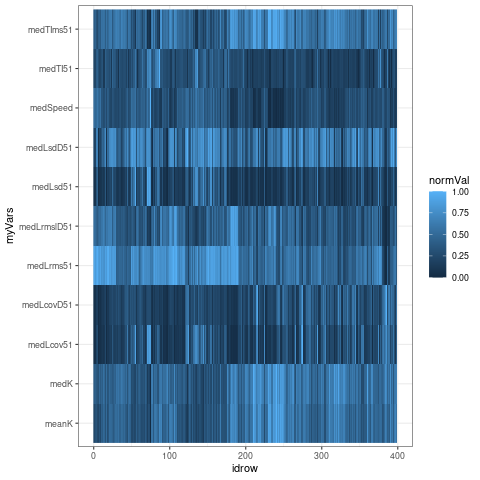

In [33]:
%%R -i jsonparams,vplot
library(rugplot)

# TODO: fix the color when colour is None/Na in PCA

lp <-  jsonlite::fromJSON(jsonparams)

# print(lp)
create_rugplot(lp, visplot = vplot)

## TODO

- create a select widget to read the filenames (done)
- create a widget to read json schemas (done)
- based on the selected filename and json schemas, populate the form (done)
- Fail to color scatterplot
- fix the color when colour is None/Na in PCA
- Test the rest of the plots
- Find why facets are not displayed (done)
- axes scales in violin schema
- in axes scales, (violin plots), modify schema to accept array of pairs (label = new lavel)

In [164]:
## Accessing elements in form
# form.widget.children[2].children[1].observe(on_value_change2,names='value')

To get access to the current data, we can use the `data` property of `form`:

The data displayed in the widget can also be live-updated by setting the `data` property:

In [ ]:
# for aes in schema['properties']['aesthetics']['properties']:
#     schema['properties']['aesthetics']['properties'][aes]['enum']= fcolumns
#     print(aes)
#     #aes['enum']= fcolumns
# schema